In [1]:
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Question 1
#1.1

ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
#选出我们所需要研究的地区5S-5N,170W-120W，lat 中只包含-6 -4 -2 0 2 4 6纬度，所以我们采用（-5，5)或则（-4，4）都是一样的
ds_research = ds.sel(lat = slice(-5,5),lon = slice(190,240))
#I got insprit by read https://blog.csdn.net/Blue_wjh/article/details/118584736,将sst数据按月分布
ds_data_month = ds_research.sst.groupby('time.month')
ds_data_month_avg = ds_data_month.mean(dim = 'time')
anmo_data= ds_data_month - ds_data_month_avg
anmo_data

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

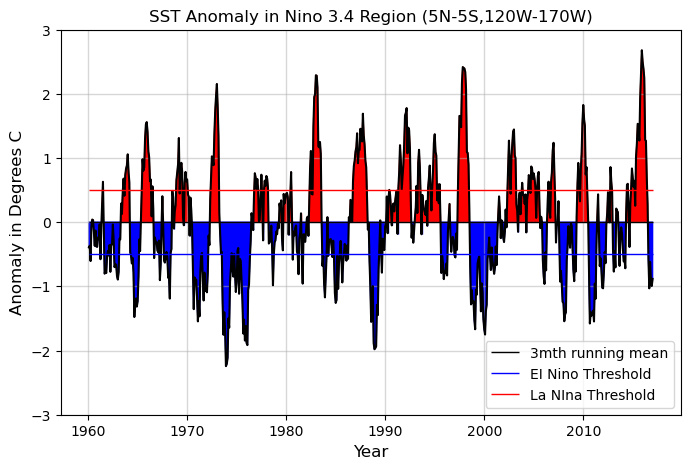

In [3]:
#1.2

#https://northfar.net/nino-intro/
#将数据按季度分配
ds_data_season = ds_research.sst.groupby('time.season')
anmo_data = ds_data_season - ds_data_season.mean(dim = 'time')
fig, ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
# #https://blog.csdn.net/qq_57099024/article/details/122448096  https://blog.csdn.net/qq_40078436/article/details/107697091
time_scale = pd.date_range(start='1960-01' , periods=684 , freq='m')
#去掉无用的nan值
anmo_data_1 = np.nanmean(anmo_data ,axis=(1,2))
ax.plot(time_scale,anmo_data_1,color = 'k')
#设置x,y轴的参数
ax.set_ylabel('Anomaly in Degrees C',color = 'k',fontsize = 12)
ax.set_ylim(-3,3)
ax.set_xlabel('Year',color = 'k',fontsize = 12)
ax.set_title('SST Anomaly in Nino 3.4 Region (5N-5S,120W-170W)',fontsize = 12)
ax.grid(linestyle = '-',linewidth = 1,alpha = 0.5)
#绘制达到0.5，-0.5形成EI Nino，La NIna
ax.hlines(y = 0, xmin = time_scale[0], xmax = time_scale[-1],color = 'k',ls= '-',linewidth = 1 , label = '3mth running mean')
ax.hlines(y = -0.5, xmin = time_scale[0], xmax = time_scale[-1],color = 'b',ls= '-',linewidth = 1 , label = 'EI Nino Threshold')
ax.hlines(y = 0.5, xmin = time_scale[0], xmax = time_scale[-1],color = 'r',ls= '-',linewidth = 1 , label = 'La NIna Threshold')
#绘制图例
ax.legend(fontsize = 10 ,frameon = True , framealpha = 1 , shadow = False)
ax.legend(loc='lower right')
#填充图形
ax.fill_between(time_scale,anmo_data_1,where = (anmo_data_1 > 0),color = 'r')
ax.fill_between(time_scale,anmo_data_1,where = (anmo_data_1 < 0),color = 'b')

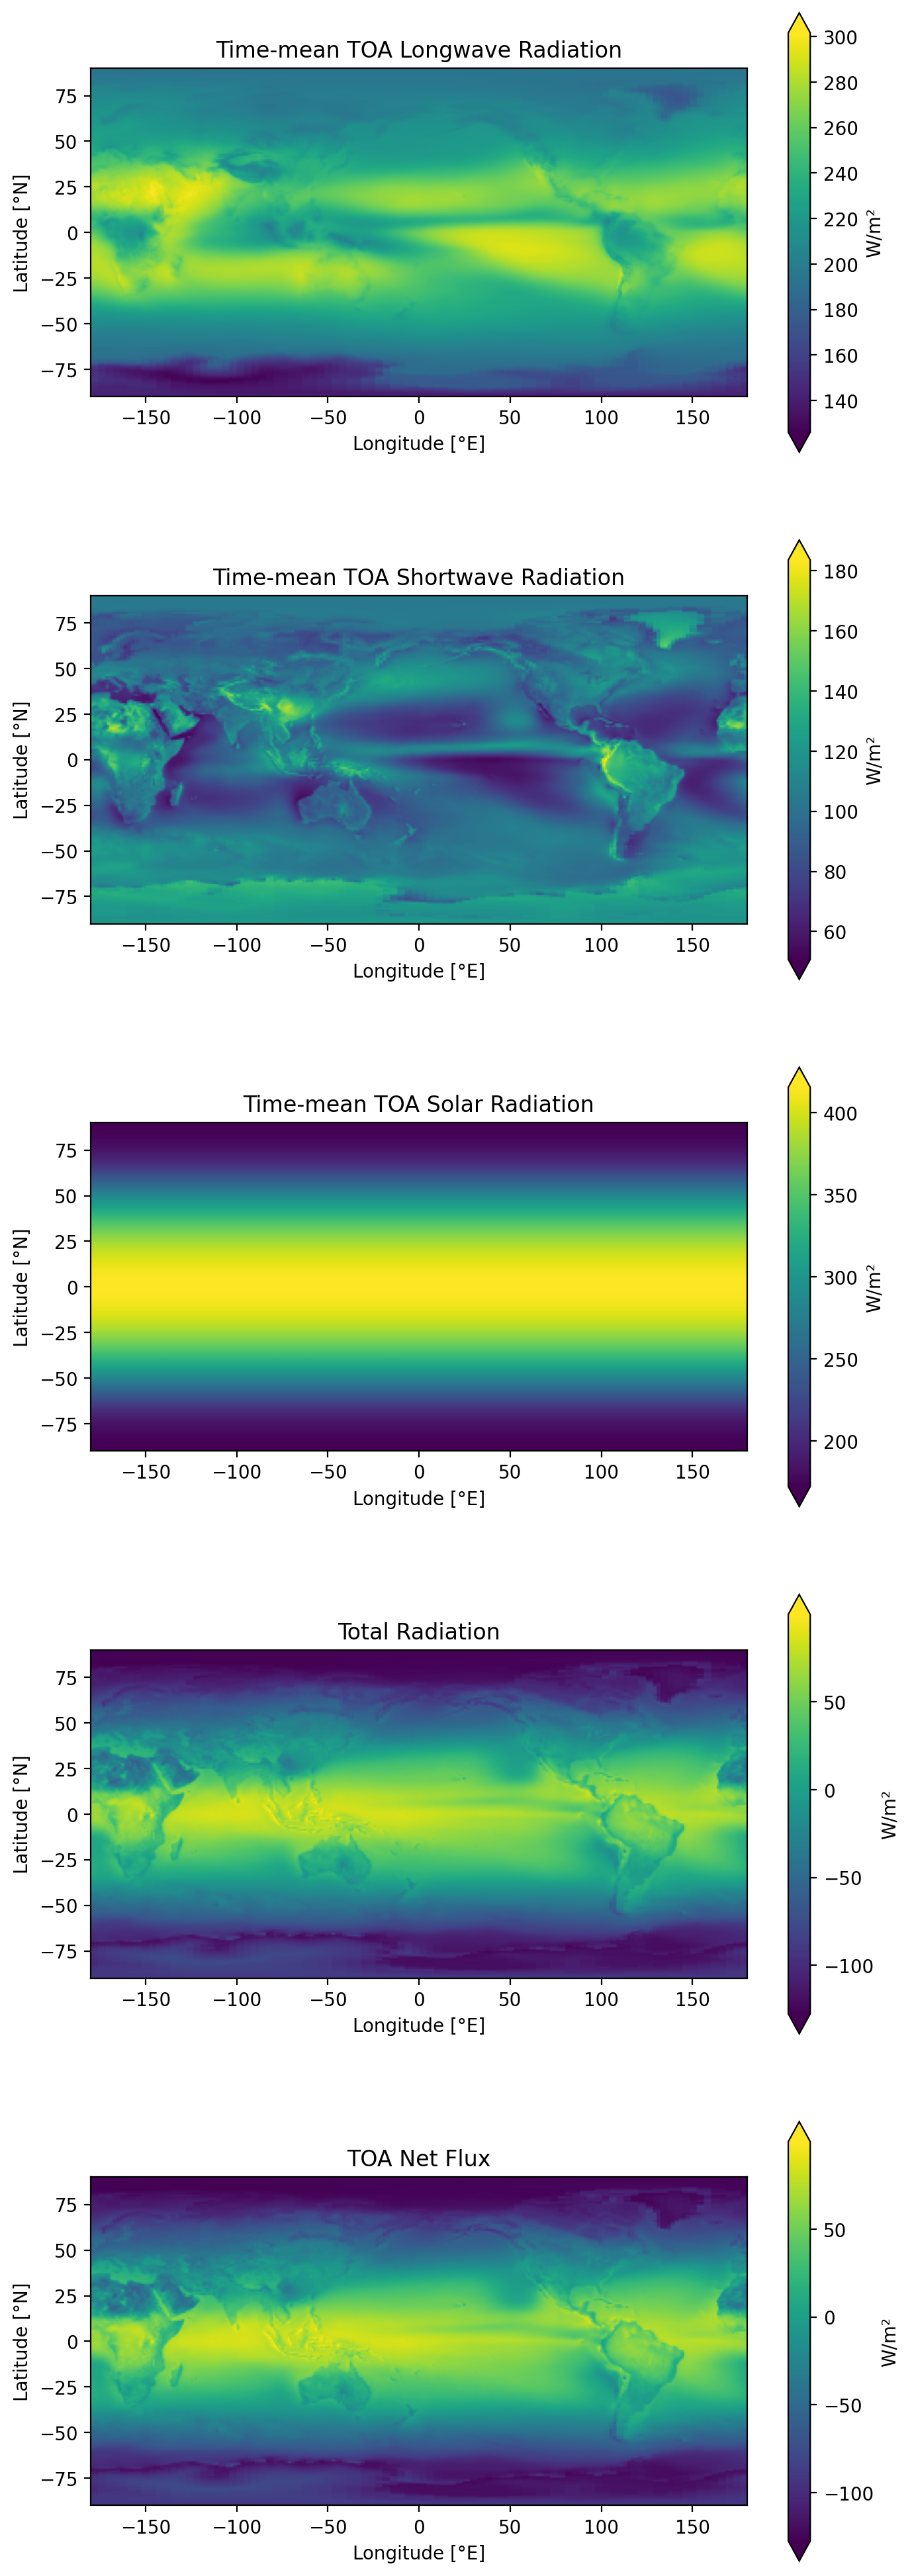

In [4]:
#Question 2
#2.1

data = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
#定义一个函数，之后调用均值
def calculate_mean_radiation(data_var):
    return data_var.mean(dim='time')
#定义一个画图的函数，之后直接套用
def plot_mean_radiation(ax, title, data_var):
    ax.set_title(title)
    ax.set_ylabel('Latitude [°N]')
    ax.set_xlabel('Longitude [°E]')
    im = ax.imshow(data_var, extent=[-180, 180, -90, 90], origin='lower')
    fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')

# 调用函数去计算所需均值
toa_lw_all_sky_mean = calculate_mean_radiation(data['toa_lw_all_mon'])
toa_sw_all_sky_mean = calculate_mean_radiation(data['toa_sw_all_mon'])
toa_solar_all_sky_mean = calculate_mean_radiation(data['solar_mon'])
#在不同的画布上画出所需图形
fig, axes = plt.subplots(5, 1, figsize=(8, 25), dpi=200)
#在第一个子图上画出顶层大气长波辐射的时间均值,之后类似
plot_mean_radiation(axes[0], 'Time-mean TOA Longwave Radiation', toa_lw_all_sky_mean)
plot_mean_radiation(axes[1], 'Time-mean TOA Shortwave Radiation', toa_sw_all_sky_mean)
plot_mean_radiation(axes[2], 'Time-mean TOA Solar Radiation', toa_solar_all_sky_mean)
total_radiation = toa_solar_all_sky_mean - toa_lw_all_sky_mean - toa_sw_all_sky_mean
plot_mean_radiation(axes[3], 'Total Radiation', total_radiation)
plot_mean_radiation(axes[4], 'TOA Net Flux', calculate_mean_radiation(data['toa_net_all_mon']))

plt.show()

In [5]:
#2.2

#计算了地球表面每个格网单元的面积，cos每个格网单元纬度的弧度的余弦值
area = (
    (data['solar_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * 0 + 1) *
    np.cos(np.deg2rad(data['solar_mon']['lat'])) *
    np.deg2rad(data['solar_mon']['lon'] - data['solar_mon']['lon'][0]) *
    6371.009 ** 2 * 1e6)

# 计算总值
earth_area = area.sum(dim=['lat', 'lon'])

# 计算每一个背景辐射
solar_radiation = (
    data['solar_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
)
lw_radiation = (
    data['toa_lw_all_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
)
sw_radiation = (
    data['toa_sw_all_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
)

# 计算总辐射
total_solar = solar_radiation.sum(dim=['lat', 'lon'])
total_lw = lw_radiation.sum(dim=['lat', 'lon'])
total_sw = sw_radiation.sum(dim=['lat', 'lon'])

print('Total incoming solar radiation:', int(total_solar.values / earth_area), 'W/m^2')
print('Total outgoing longwave radiation:', int(total_lw.values / earth_area), 'W/m^2')
print('Total outgoing shortwave radiation:', int(total_sw.values / earth_area), 'W/m^2')


Total incoming solar radiation: 340 W/m^2
Total outgoing longwave radiation: 240 W/m^2
Total outgoing shortwave radiation: 98 W/m^2


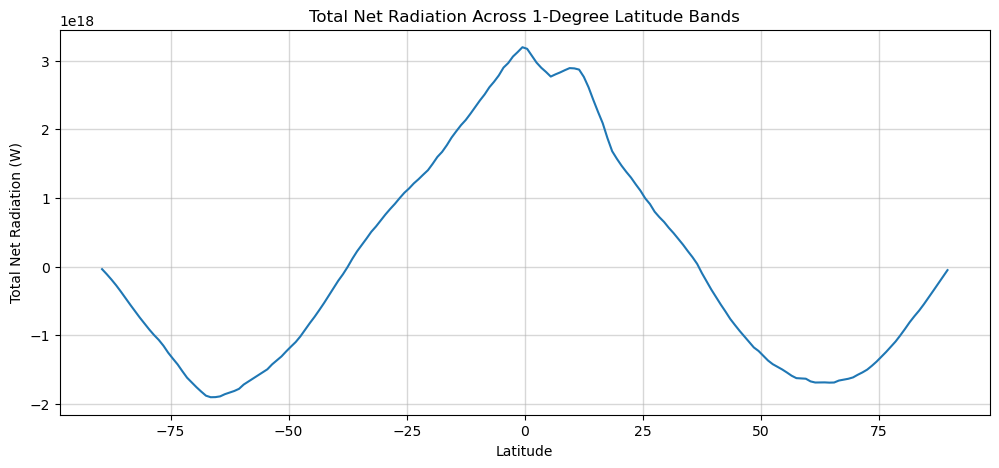

In [6]:
#2.3
# 计算每个纬度带的净辐射，考虑地球的面积权重。
net_radiation = data['toa_net_all_mon'].mean(dim='time') * area
#计算每个纬度带的总净辐射，沿经度方向求和。
net_radiation_total = net_radiation.sum(dim='lon')

plt.figure(figsize=(12, 5))
net_radiation_total.plot()
plt.title('Total Net Radiation Across 1-Degree Latitude Bands')
plt.ylabel('Total Net Radiation (W)')
plt.xlabel('Latitude')
plt.grid(linestyle = '-',linewidth = 1,alpha = 0.5)
plt.show()

In [7]:
#2.4

# 定义低云和高云覆盖区域
low_cloud_area = data['cldarea_total_daynight_mon'] <= 25
high_cloud_area = data['cldarea_total_daynight_mon'] >= 75

# 定义一个函数，根据给定的辐射变量和云区域，计算了在云区域内的时间平均辐射值
def calculate_mean_radiation(data_var, cloud_area):
    return data[data_var].where(cloud_area).mean(dim='time')

# 定义一个函数来便利画图
def plot_mean_radiation(ax, title, radiation_data):
    ax.set_title(title)
    ax.set_ylabel('Latitude [°N]')
    ax.set_xlabel('Longitude [°E]')
    im = ax.imshow(radiation_data, extent=[-180, 180, -90, 90], origin='lower')
    fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')

# 计算低云和高云区域的出射短波和长波辐射
sw_low_cloud_area_mean = calculate_mean_radiation('toa_sw_all_mon', low_cloud_area)
lw_low_cloud_area_mean = calculate_mean_radiation('toa_lw_all_mon', low_cloud_area)
sw_high_cloud_area_mean = calculate_mean_radiation('toa_sw_all_mon', high_cloud_area)
lw_high_cloud_area_mean = calculate_mean_radiation('toa_lw_all_mon', high_cloud_area)

fig, axes = plt.subplots(4, 1, figsize=(10, 20),dpi = 1000)
plot_mean_radiation(axes[0], 'Time-mean Outgoing Shortwave Radiation for Low Cloud Area Regions', sw_low_cloud_area_mean)
plot_mean_radiation(axes[1], 'Time-mean Outgoing Longwave Radiation for Low Cloud Area Regions', lw_low_cloud_area_mean)
plot_mean_radiation(axes[2], 'Time-mean Outgoing Shortwave Radiation for High Cloud Area Regions', sw_high_cloud_area_mean)
plot_mean_radiation(axes[3], 'Time-mean Outgoing Longwave Radiation for High Cloud Area Regions', lw_high_cloud_area_mean)
plt.show()

In [8]:
#2.5

# 计算低云区域和高云区域的平均出射短波和长波辐射
sw_low_cloud_area_mean = data['toa_sw_all_mon'].where(low_cloud_area).mean()
lw_low_cloud_area_mean =data['toa_lw_all_mon'].where(low_cloud_area).mean()
sw_high_cloud_area_mean = data['toa_sw_all_mon'].where(high_cloud_area).mean()
lw_high_cloud_area_mean = data['toa_lw_all_mon'].where(high_cloud_area).mean()

print('Global mean shortwave radiation in low cloud regions:', int(sw_low_cloud_area_mean.values), 'W/m^2')
print('Global mean longwave radiation in low cloud regions:', int(lw_low_cloud_area_mean.values), 'W/m^2')
print('Global mean shortwave radiation in high cloud regions:', int(sw_high_cloud_area_mean.values), 'W/m^2')
print('Global mean longwave radiation in high cloud regions:', int(lw_high_cloud_area_mean.values), 'W/m^2')

# 分析云对短波和长波辐射的整体效应，即在高云区域和低云区域之间的差异。
effect_sw = sw_high_cloud_area_mean.values - sw_low_cloud_area_mean.values
effect_lw = lw_high_cloud_area_mean.values - lw_low_cloud_area_mean.values

print('Overall effect of clouds on shortwave radiation:', int(effect_sw), 'W/m^2')
print('Overall effect of clouds on longwave radiation:', int(effect_lw), 'W/m^2')

Global mean shortwave radiation in low cloud regions: 97 W/m^2
Global mean longwave radiation in low cloud regions: 247 W/m^2
Global mean shortwave radiation in high cloud regions: 111 W/m^2
Global mean longwave radiation in high cloud regions: 215 W/m^2
Overall effect of clouds on shortwave radiation: 14 W/m^2
Overall effect of clouds on longwave radiation: -31 W/m^2


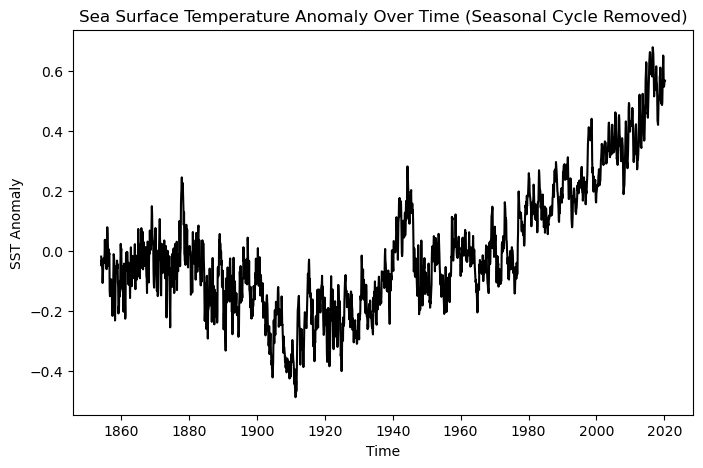

In [9]:
#Question 3
#3.1

#数据来源https://downloads.psl.noaa.gov/Datasets/noaa.ersst/
ds_1= xr.open_dataset("sst.mnmean.v4.nc",engine="netcdf4")
month_data = ds_1.sst.groupby('time.month')
month_data_avg = month_data.mean(dim='time')
# 从原始数据中减去月度平均值，得到去除了月度季节循环的时间序列
sst_anomaly = month_data - month_data_avg
time_scale = pd.date_range(start='1854-01' , periods = 1994 , freq='m')
anmo_data_1 = np.nanmean(sst_anomaly ,axis=(1,2))
# 绘制去除了月度季节循环的 SST 时间序列
fig, ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
ax.plot(time_scale,anmo_data_1,color = 'k')
plt.title('Sea Surface Temperature Anomaly Over Time (Seasonal Cycle Removed)') 
plt.xlabel('Time') 
plt.ylabel('SST Anomaly') 
plt.show()


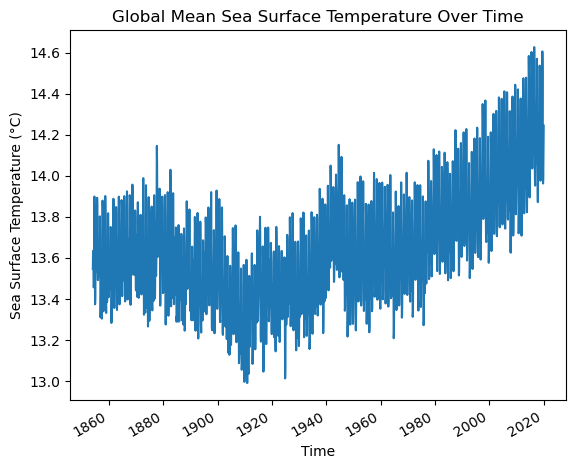

In [10]:
#3.2

#绘制不同时间海平面温度图
ds_1['sst'].mean(dim=('lat', 'lon')).plot()
plt.title('Global Mean Sea Surface Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature (°C)')
plt.show()

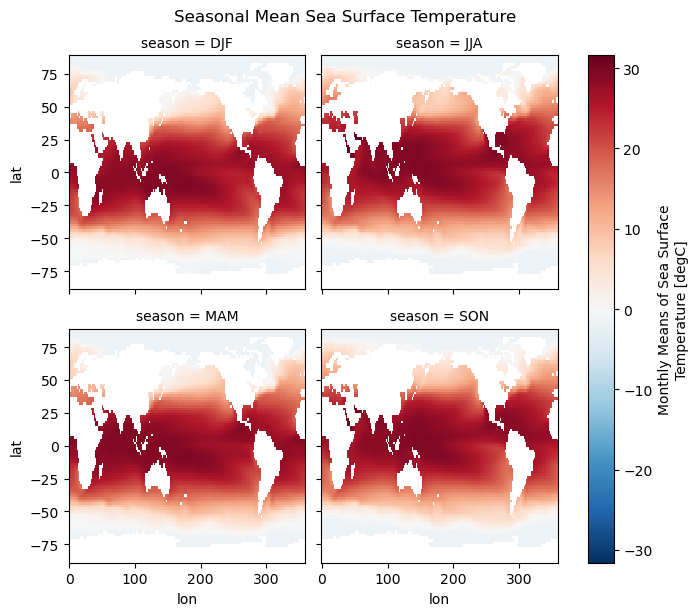

In [11]:
#绘制不同季节的海表温度的平均空间分布图
ds_1['sst'].groupby('time.season').mean(dim='time').plot(x='lon', y='lat', col='season', col_wrap=2)
plt.suptitle('Seasonal Mean Sea Surface Temperature',y=1.02)#调节标题与图片的间距
plt.show()

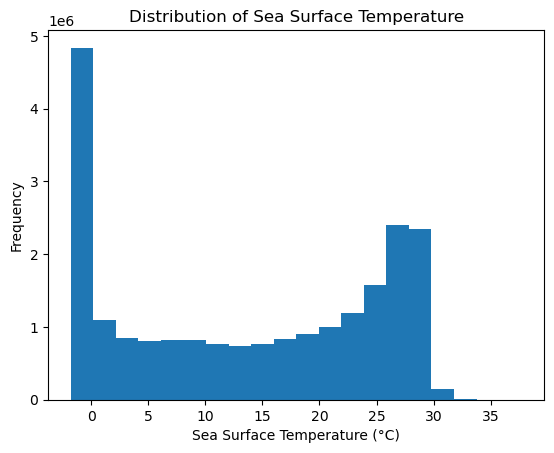

In [12]:
#绘制海表温度的直方图
ds_1['sst'].plot.hist(bins=20)
plt.title('Distribution of Sea Surface Temperature')
plt.xlabel('Sea Surface Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

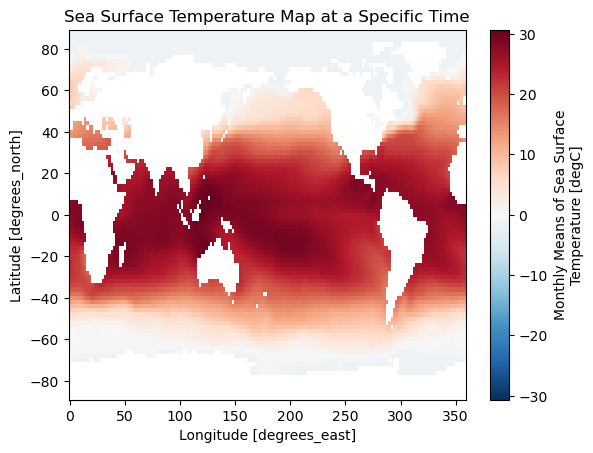

In [13]:
#绘制海表温度在特定时间点的空间分布图
ds_1['sst'].isel(time=0).plot.pcolormesh(x='lon', y='lat')  #使用plot方法绘制海表温度的伪彩色图
plt.title('Sea Surface Temperature Map at a Specific Time')
plt.show()

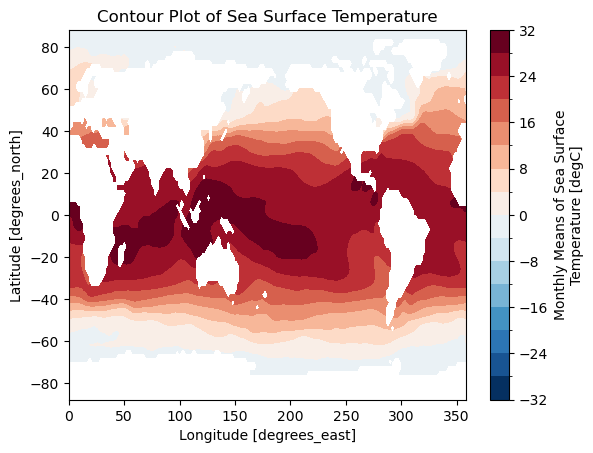

In [14]:
#绘制海表温度在特定时间点的等值线图
ds_1['sst'].isel(time=0).plot.contourf(levels=20)  # 使用plot方法绘制等值线图，其中contourf表示填充颜色的等值线。levels=20指定等值线的数量，即将温度范围分成20个区间。
plt.title('Contour Plot of Sea Surface Temperature')
plt.show()